
##### **Random Sample Imputation**

##### Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

##### When should it be used? It assumes that the data are missing completely at random(MCAR)

In [7]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [10]:
df['Age'].isnull().sum()

177

In [11]:
# generate random values to fill null values
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)
random_sample

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [12]:
# get index of null values
random_sample_index = df[df['Age'].isnull()].index
random_sample_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [16]:
def impute_nan(df, variable):
  df[variable+"_random"]=df[variable]
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index = df[df[variable].isnull()].index
  df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [17]:
impute_nan(df, 'Age')

In [18]:
df.head()

,Survived,Age,Fare,Age_random
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [25]:
median = df['Age'].median()
df['Age_median'] = df['Age'].fillna(median)

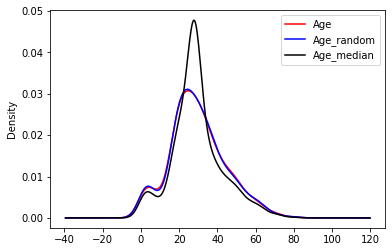

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot( kind='kde', color='red', ax=ax)
df['Age_random'].plot(kind='kde', color='blue', ax=ax)
df['Age_median'].plot(kind='kde', color='black', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

**Advantages**
  1. Easy To implement
  2. There is less distortion in variance
  
**Disadvantage**
  1. Every situation randomness wont work